## Plots for Fig. 1 and Fig. 4b for Meg Urry's 2016 NSF Proposal
Grant Tremblay, Yale University

In [22]:
import os
import glob
import math
import numpy as np

import matplotlib.pyplot as plt

from astropy.io import ascii
from astropy.table import vstack
from astropy import units as u
from astropy import constants as const

For now, I'll use the ```matplotlib``` ```ggplot``` style from R. It's pretty. 

In [23]:
# Plots should be pretty
plt.style.use('ggplot')
%matplotlib inline

Find the data tables and dump them into lists. 

In [24]:
lum_v_z_files = glob.glob('data/lum_v_z/*')
r_k_files = glob.glob('data/r-k/*')

Populate the redshift-Luminosity tables. 

In [25]:
lum_v_z_files

['data/lum_v_z/nsf_cdfs_lum_v_z.txt',
 'data/lum_v_z/nsf_cosmos_lum_v_z.txt',
 'data/lum_v_z/nsf_s82x_lum_v_z.txt']

In [26]:
r_k_files

['data/r-k/nsf2016_prop_extragalactic_srcs.txt',
 'data/r-k/nsf2016_prop_r-w1_v_r-k_stars.txt',
 'data/r-k/nsf2016_prop_sources_lacking_redshifts.txt',
 'data/r-k/nsf2016_prop_stars.txt',
 'data/r-k/nsf2016_prop_targets.txt']

In [27]:
column_names_lum_v_z = ["z", "Xlum"]
s82x_lum_v_z = ascii.read(lum_v_z_files[2], names=column_names_lum_v_z)
cosmos_lum_v_z = ascii.read(lum_v_z_files[1], names=column_names_lum_v_z)
cdfs_lum_v_z = ascii.read(lum_v_z_files[0], names=column_names_lum_v_z)


Populate the *R-K* tables. 

In [28]:
r_k_files

['data/r-k/nsf2016_prop_extragalactic_srcs.txt',
 'data/r-k/nsf2016_prop_r-w1_v_r-k_stars.txt',
 'data/r-k/nsf2016_prop_sources_lacking_redshifts.txt',
 'data/r-k/nsf2016_prop_stars.txt',
 'data/r-k/nsf2016_prop_targets.txt']

In [29]:
column_names_r_k = ["R-K", "X/O"]

extragalactic_sources_r_k = ascii.read(r_k_files[0], names=column_names_r_k)
stars_r_k = ascii.read(r_k_files[3], names=column_names_r_k)

sources_lacking_redshifts_r_k = ascii.read(r_k_files[2], names=column_names_r_k)

rw1_stars_r_k = ascii.read(r_k_files[1], names=column_names_r_k)

targets_r_k = ascii.read(r_k_files[4], names=column_names_r_k)

# Also, just make an appended array for all "stars" in one lump

stars = vstack([rw1_stars_r_k, stars_r_k])

These are now ```Astropy``` table objects. 

### Make a *L-z* plot

/Applications/Anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


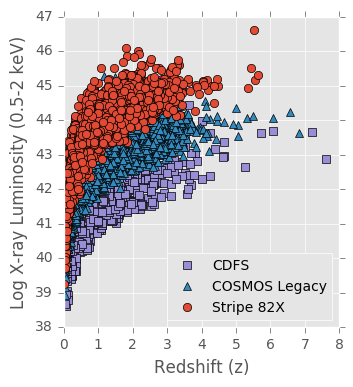

In [40]:
plt.figure()
fig, ax = plt.subplots()

ax.set_xlabel('Redshift (z)')
ax.set_ylabel('Log X-ray Luminosity (0.5-2 keV)')


ax.plot(cdfs_lum_v_z["z"], cdfs_lum_v_z["Xlum"], marker='s', linestyle="None", alpha=1.0, label="CDFS", color=plt.rcParams['axes.color_cycle'][2])
ax.plot(cosmos_lum_v_z["z"], cosmos_lum_v_z["Xlum"], marker='^', linestyle="None", alpha=1.0, label="COSMOS Legacy", color=plt.rcParams['axes.color_cycle'][1])
ax.plot(s82x_lum_v_z["z"], s82x_lum_v_z["Xlum"], marker='o', linestyle="None", alpha=1.0, label="Stripe 82X", color=plt.rcParams['axes.color_cycle'][0])

ax.legend(loc=4, frameon=True, numpoints=1, prop={'size':10}) 

plt.savefig("Fig1b.pdf")

ax.set_aspect('equal')
plt.savefig("Fig1b_equal_aspect.pdf")

### Make an *r-k* plot

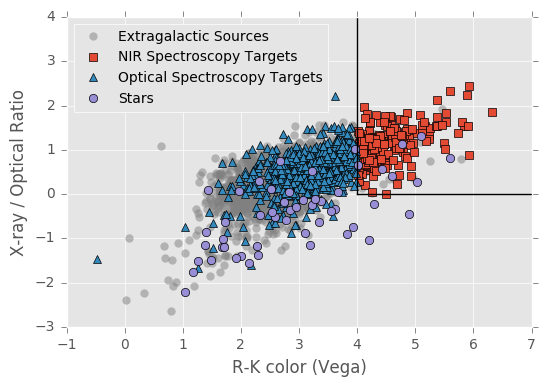

In [36]:
plt.figure()
fig, ax = plt.subplots()

ax.set_xlabel('R-K color (Vega)')
ax.set_ylabel('X-ray / Optical Ratio')


ax.plot(extragalactic_sources_r_k["R-K"], extragalactic_sources_r_k["X/O"], marker='o', color="Gray", markeredgewidth=0, alpha=0.5,  linestyle="None", label="Extragalactic Sources")
ax.plot(targets_r_k["R-K"], targets_r_k["X/O"], marker='s', linestyle="None", label="NIR Spectroscopy Targets")
ax.plot(sources_lacking_redshifts_r_k["R-K"], sources_lacking_redshifts_r_k["X/O"], marker='^', linestyle="None", label="Optical Spectroscopy Targets")
ax.plot(stars["R-K"], stars["X/O"], marker='o', linestyle="None", label="Stars")

ax.plot([4, 7], [0, 0], color='k', linestyle='-', linewidth=1)
ax.plot([4, 4], [0, 4], color='k', linestyle='-', linewidth=1)


ax.legend(loc=0, frameon=True, numpoints=1, prop={'size':10}) 

plt.savefig("Fig4b.pdf")